In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [89]:
def plot_hist_variaveis(conjunto, dataframe, i=0, legend=None, title='distribuição das variáveis numéricas'):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(20,6*total_plots))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    fig.suptitle(title, y=0.895)


    for var in conjunto:
        mean = dataframe[var].mean()
        max = dataframe[var].max()
        first_quartile = dataframe[var].quantile(0.25)
        third_quartile = dataframe[var].quantile(0.75)
        ax = fig.add_subplot(total_plots, 2, i+1)
        if legend is not None:
            sns.histplot(x=dataframe[var], ax=ax, color='#435058', hue=dataframe[legend], alpha=0.5, kde=True)
        else:
            sns.histplot(x=dataframe[var], ax=ax, color='#435058', alpha=0.5,  kde=True)
        ax.set_title(var)
        ax.set_ylabel('')
        ax.set_xlabel('')
        ax.axvline(mean, color='r', linestyle='--')
        ax.axvline(first_quartile, color='g', linestyle='--')
        ax.axvline(third_quartile, color='g', linestyle='--')
        ax.text(ax.get_xlim()[0], ax.get_ylim()[1]+((ax.get_ylim()[1])/11), 'Média: {:.2f}'.format(mean))
        ax.text(ax.get_xlim()[0], ax.get_ylim()[1]+((ax.get_ylim()[1])/20), 'Máximo: {:.2f}'.format(max))
        
        i += 1

def plot_bar_variaveis(conjunto, dataframe, x_var, i=0, title='distribuição das variáveis numéricas', legend=None, annotate=None):
    total_plots = len(conjunto)
    fig = plt.figure(figsize=(20,6*total_plots))
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    fig.suptitle(title, y=0.895)

    for var in conjunto:
        ax = fig.add_subplot(total_plots, 2, i+1)
        #dataframe = dataframe.groupby(x_var).mean()

        if legend is not None:
            sns.barplot(y=dataframe[var], ax=ax, x=dataframe[x_var], hue=dataframe[legend])
        else:
            sns.barplot(y=dataframe[var], ax=ax, x=dataframe[x_var])

        if annotate:
            for p in ax.patches:
                x = p.get_x() + p.get_width()/2
                y = p.get_height()
                ax.annotate(f'{y:.2}', (x, y), ha='center', va='bottom', fontsize=10)
            
        ax.set_title(var)
        ax.set_ylabel('')
        ax.set_xlabel('')


        i += 1


def create_log_variable (conjunto, dataframe):
    for var in conjunto:
        dataframe[var+'_log'] = dataframe[var].apply(lambda x: np.log(x) if x > 0 else 0)
    return dataframe

def normalization_test (conjunto, dataframe, alpha=0.05):
    for col in conjunto:
        statistic, p_value = stats.shapiro(dataframe[col])
        if p_value > alpha:
            print(col, 'H0: Normal distribution')
        else:
            print(col, 'H1: Non-normal distribution')

def plot_bar_percentages(dataframe, var, rotation=0, fig=None, ax=None, i=[]):
    count_dataframe = dataframe[[var]].value_counts().reset_index(name='count')
    count_dataframe['percentage'] = count_dataframe['count'] / count_dataframe['count'].sum()

    if fig is None and ax is None:
        fig, ax = plt.subplots(figsize=(10,6))
        sns.barplot(x=var, y='percentage', data=count_dataframe)
    else:
        sns.barplot(x=var, y='percentage', data=count_dataframe, ax=ax)

    for p in ax.patches:
        x = p.get_x() + p.get_width()/2
        y = p.get_height()
        ax.annotate(f'{y:.2%}', (x, y), ha='center', va='bottom', fontsize=10)
 
    
    plt.xticks(rotation=rotation)

    

In [3]:
dir_price = 'price_data.csv'
dir_client = 'client_data.csv'

df_price = pd.read_csv(dir_price)
df_client = pd.read_csv(dir_client)

In [4]:
df_client['id'].nunique()
df_client.shape

(14606, 26)

In [5]:
df_price['id'].nunique()
df_price.shape

(193002, 8)

In [6]:
df = df_client.merge(df_price, how='inner', on='id')

In [7]:
df['channel_sales'] = df['channel_sales'].factorize()[0]

In [8]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 175149 entries, 0 to 175148
Data columns (total 33 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              175149 non-null  object 
 1   channel_sales                   175149 non-null  int64  
 2   cons_12m                        175149 non-null  int64  
 3   cons_gas_12m                    175149 non-null  int64  
 4   cons_last_month                 175149 non-null  int64  
 5   date_activ                      175149 non-null  object 
 6   date_end                        175149 non-null  object 
 7   date_modif_prod                 175149 non-null  object 
 8   date_renewal                    175149 non-null  object 
 9   forecast_cons_12m               175149 non-null  float64
 10  forecast_cons_year              175149 non-null  int64  
 11  forecast_discount_energy        175149 non-null  float64
 12  forecast_meter_r

In [9]:
df = df.drop_duplicates()

In [10]:
for var in ['channel_sales','origin_up']:
    df[var] = df[var].factorize()[0]

In [11]:
for var in ['date_activ', 'date_end', 'date_modif_prod', 'date_renewal']:
    df[var] = pd.to_datetime(df[var], format='%Y-%m-%d')


df['year_activ'] = df['date_activ'].dt.year
df['year_renewal'] = df['date_renewal'].dt.year
df['year_modif_prod'] = df['date_modif_prod'].dt.year
df['year_end'] = df['date_end'].dt.year


<AxesSubplot: >

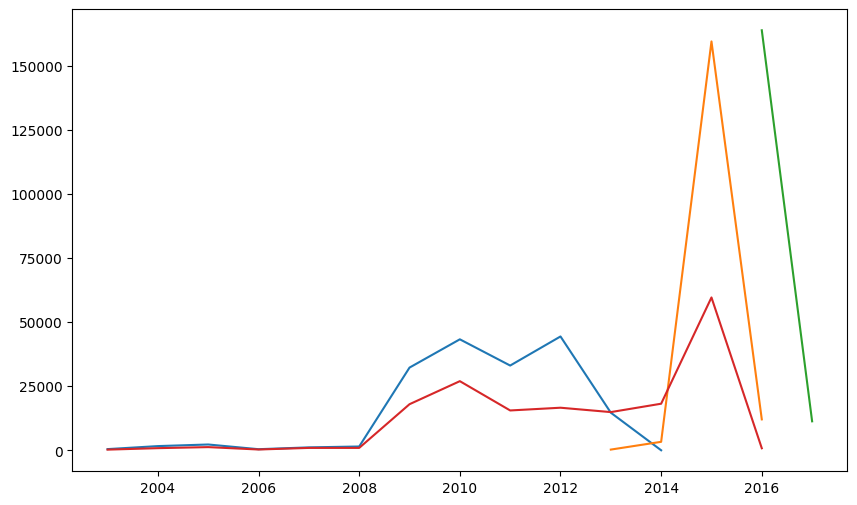

In [12]:
fig, axes = plt.subplots()
df['year_activ'].value_counts().sort_index(ascending=True).plot(kind='line', figsize=(10, 6))
df['year_renewal'].value_counts().sort_index(ascending=True).plot(kind='line', figsize=(10, 6))
df['year_end'].value_counts().sort_index(ascending=True).plot(kind='line', figsize=(10, 6))
df['year_modif_prod'].value_counts().sort_index(ascending=True).plot(kind='line', figsize=(10, 6))

In [13]:
date_vars = df.select_dtypes(include=[np.datetime64]).columns.to_list()
num_vars = df.select_dtypes(include=[np.number]).columns.to_list()

df_dates = df[date_vars]

In [14]:
df.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn',
       'price_date', 'price_off_peak_var', 'price_peak_var',
       'price_mid_peak_var', 'price_off_peak_fix', 'price_peak_fix',
       'price_mid_peak_fix', 'year_activ', 'year_renewal', 'year_modif_prod',
       'year_end'],
      dtype='object')

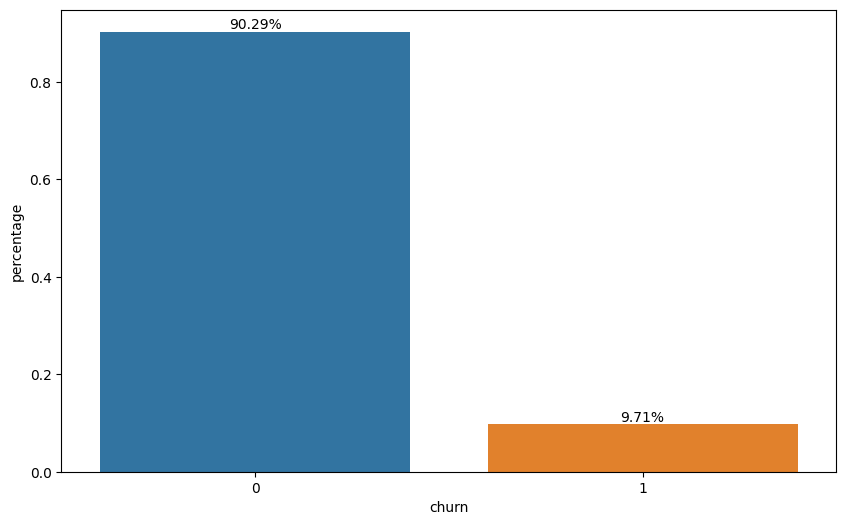

In [26]:
plot_bar_percentages(dataframe=df, var='churn')

In [36]:
df_had_churn = df[df['churn'] == 1]
df_not_churn = df[df['churn'] == 0]

Text(0.5, 1.0, 'Not Churn')

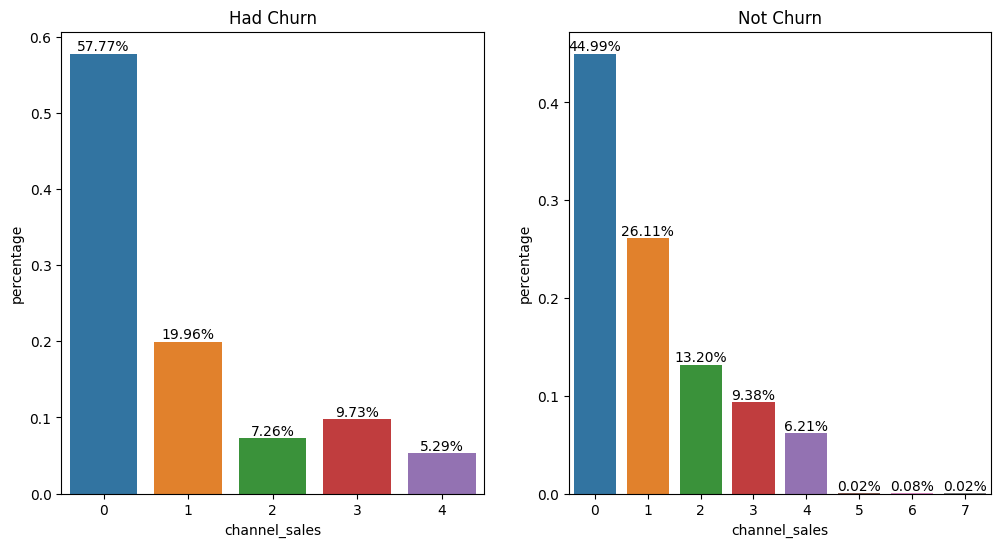

In [40]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2, nrows=1)
plot_bar_percentages(df_had_churn, 'channel_sales', fig=fig, ax=ax[0])
plot_bar_percentages(df_not_churn, 'channel_sales', fig=fig, ax=ax[1])
ax[0].set_title('Had Churn')
ax[1].set_title('Not Churn')

Text(0.5, 1.0, 'Not Churn')

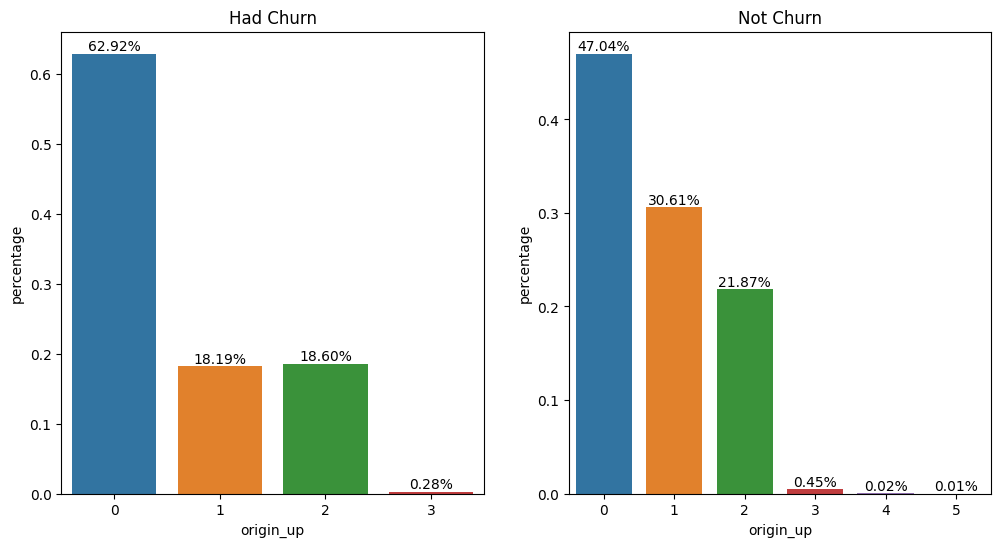

In [41]:
fig, ax = plt.subplots(figsize=(12, 6), ncols=2, nrows=1)
plot_bar_percentages(df_had_churn, 'origin_up', fig=fig, ax=ax[0])
plot_bar_percentages(df_not_churn, 'origin_up', fig=fig, ax=ax[1])
ax[0].set_title('Had Churn')
ax[1].set_title('Not Churn')

Text(0.5, 0.98, 'Alterações no contrato de serviço por ano')

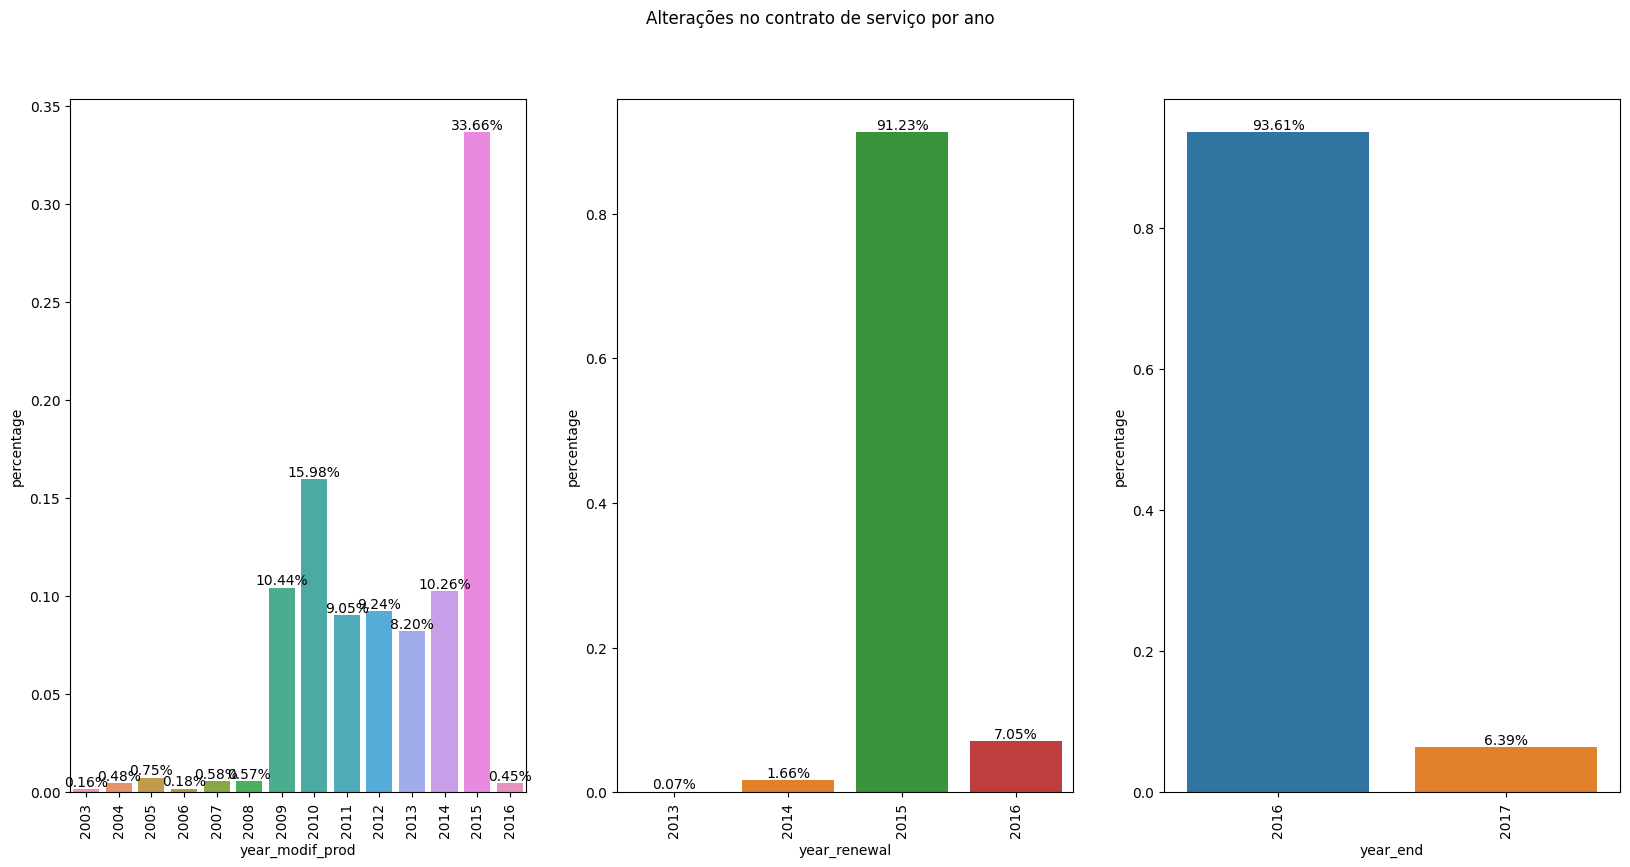

In [83]:
fig, ax = plt.subplots(figsize=(20, 9), ncols=3, nrows=1)
plot_bar_percentages(df_not_churn, 'year_modif_prod', fig=fig, ax=ax[0])
plot_bar_percentages(df_had_churn, 'year_renewal', fig=fig, ax=ax[1])
plot_bar_percentages(df_not_churn, 'year_end', fig=fig, ax=ax[2])

for ax_ in ax:
    ax_.tick_params(axis='x', rotation=90)

fig.suptitle('Alterações no contrato de serviço por ano')
#df_had_churn['year_renewal'].dt.year.value_counts().sort_index().plot(kind='bar')

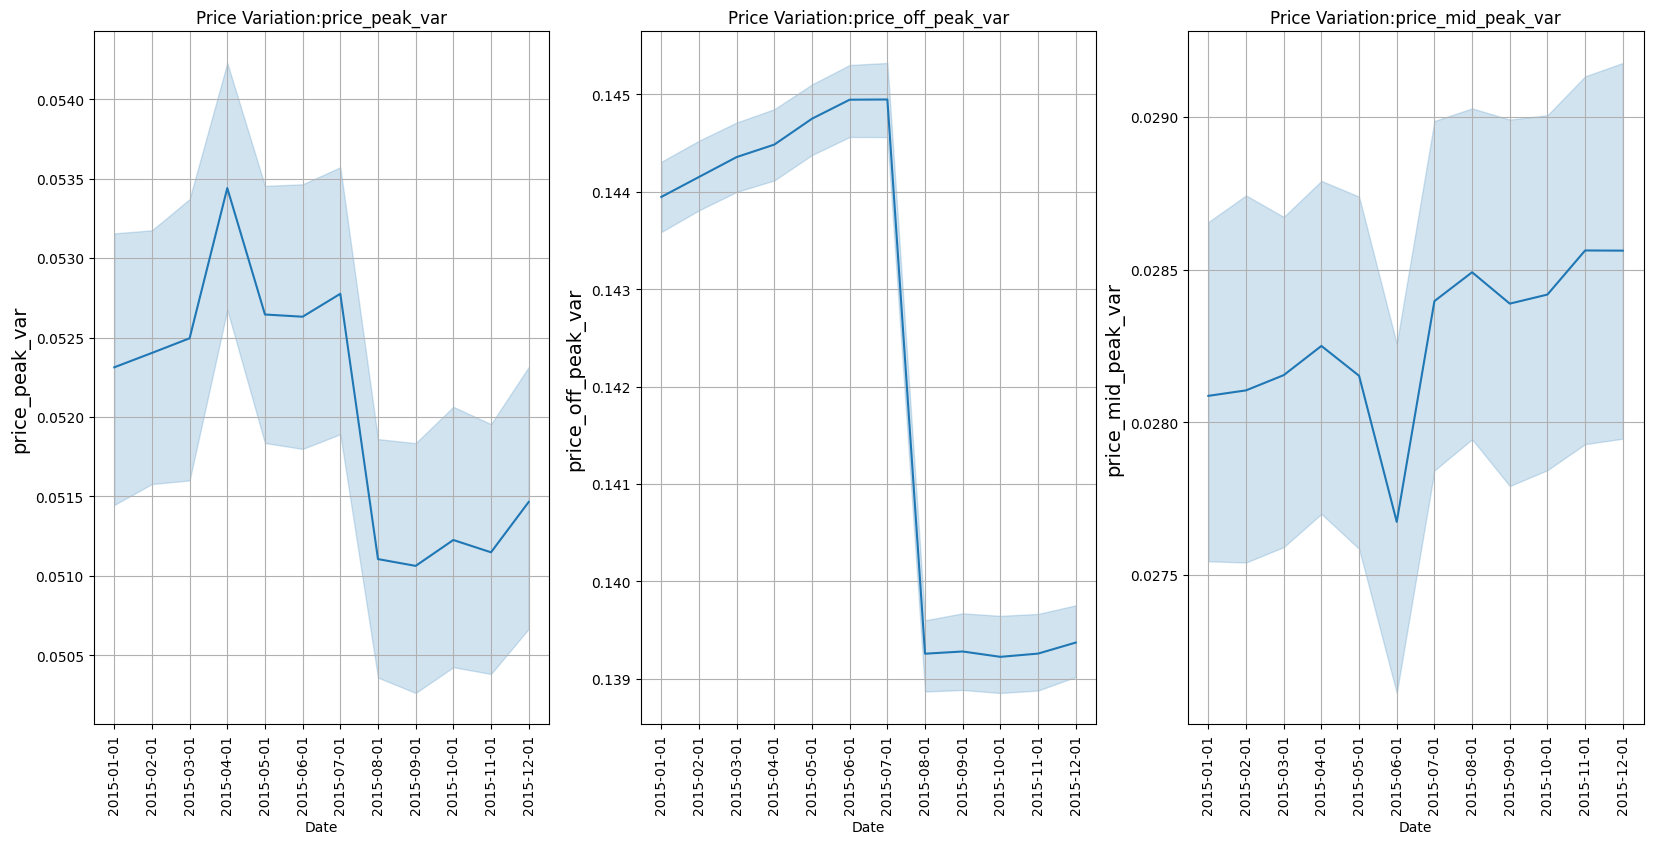

In [62]:
fig, ax = plt.subplots(figsize=(20, 9), nrows=1, ncols=3)
sns.lineplot(x='price_date', y='price_peak_var', data=df, ax=ax[0])
sns.lineplot(x='price_date', y='price_off_peak_var', data=df, ax=ax[1])
sns.lineplot(x='price_date', y='price_mid_peak_var', data=df, ax=ax[2])

for ax_ in ax:
    ax_.set_xlabel('Date')
    ax_.set_ylabel(ax_.get_ylabel(), fontsize=14)
    ax_.set_title('Price Variation:' + ax_.get_ylabel())
    ax_.tick_params(axis='x', rotation=90)
    ax_.grid(True)

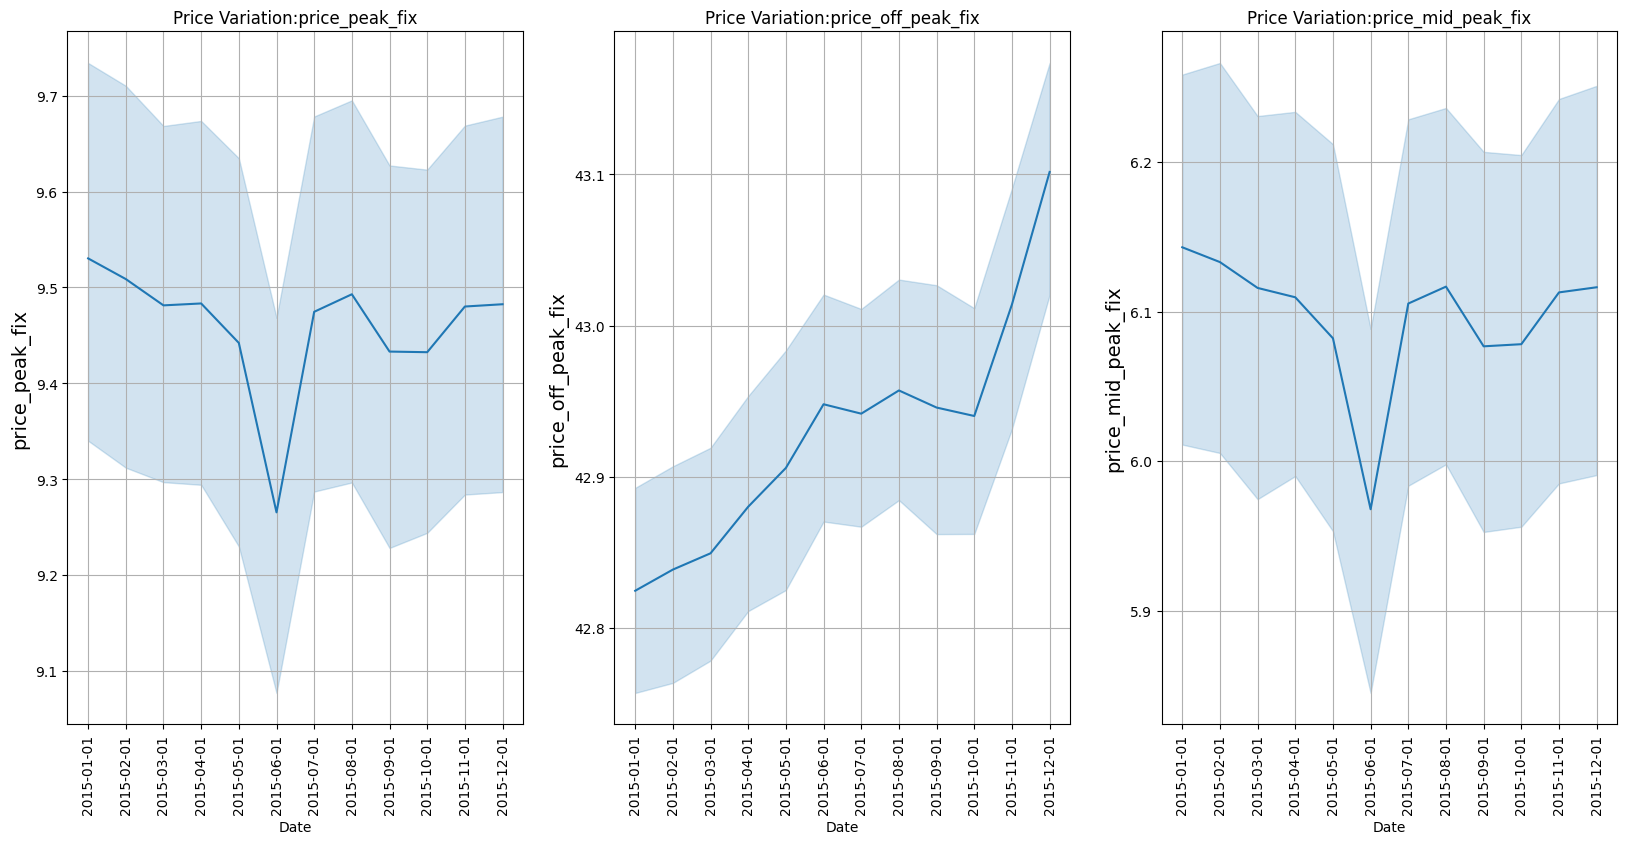

In [63]:
fig, ax = plt.subplots(figsize=(20, 9), nrows=1, ncols=3)
sns.lineplot(x='price_date', y='price_peak_fix', data=df, ax=ax[0])
sns.lineplot(x='price_date', y='price_off_peak_fix', data=df, ax=ax[1])
sns.lineplot(x='price_date', y='price_mid_peak_fix', data=df, ax=ax[2])

for ax_ in ax:
    ax_.set_xlabel('Date')
    ax_.set_ylabel(ax_.get_ylabel(), fontsize=14)
    ax_.set_title('Price Variation:' + ax_.get_ylabel())
    ax_.tick_params(axis='x', rotation=90)
    ax_.grid(True)

In [100]:
vars_consumo = ['cons_12m', 'cons_gas_12m', 'cons_last_month']
vars_consumo_previsto = ['forecast_cons_12m', 'forecast_cons_year']
vars_consumo_pago = ['imp_cons']
vars_lucro = ['margin_gross_pow_ele', 'margin_net_pow_ele', 'net_margin']
vars_produto = ['num_years_antig', 'nb_prod_act', 'pow_max']

df_churn_mean = df.groupby('churn', as_index=False).mean()

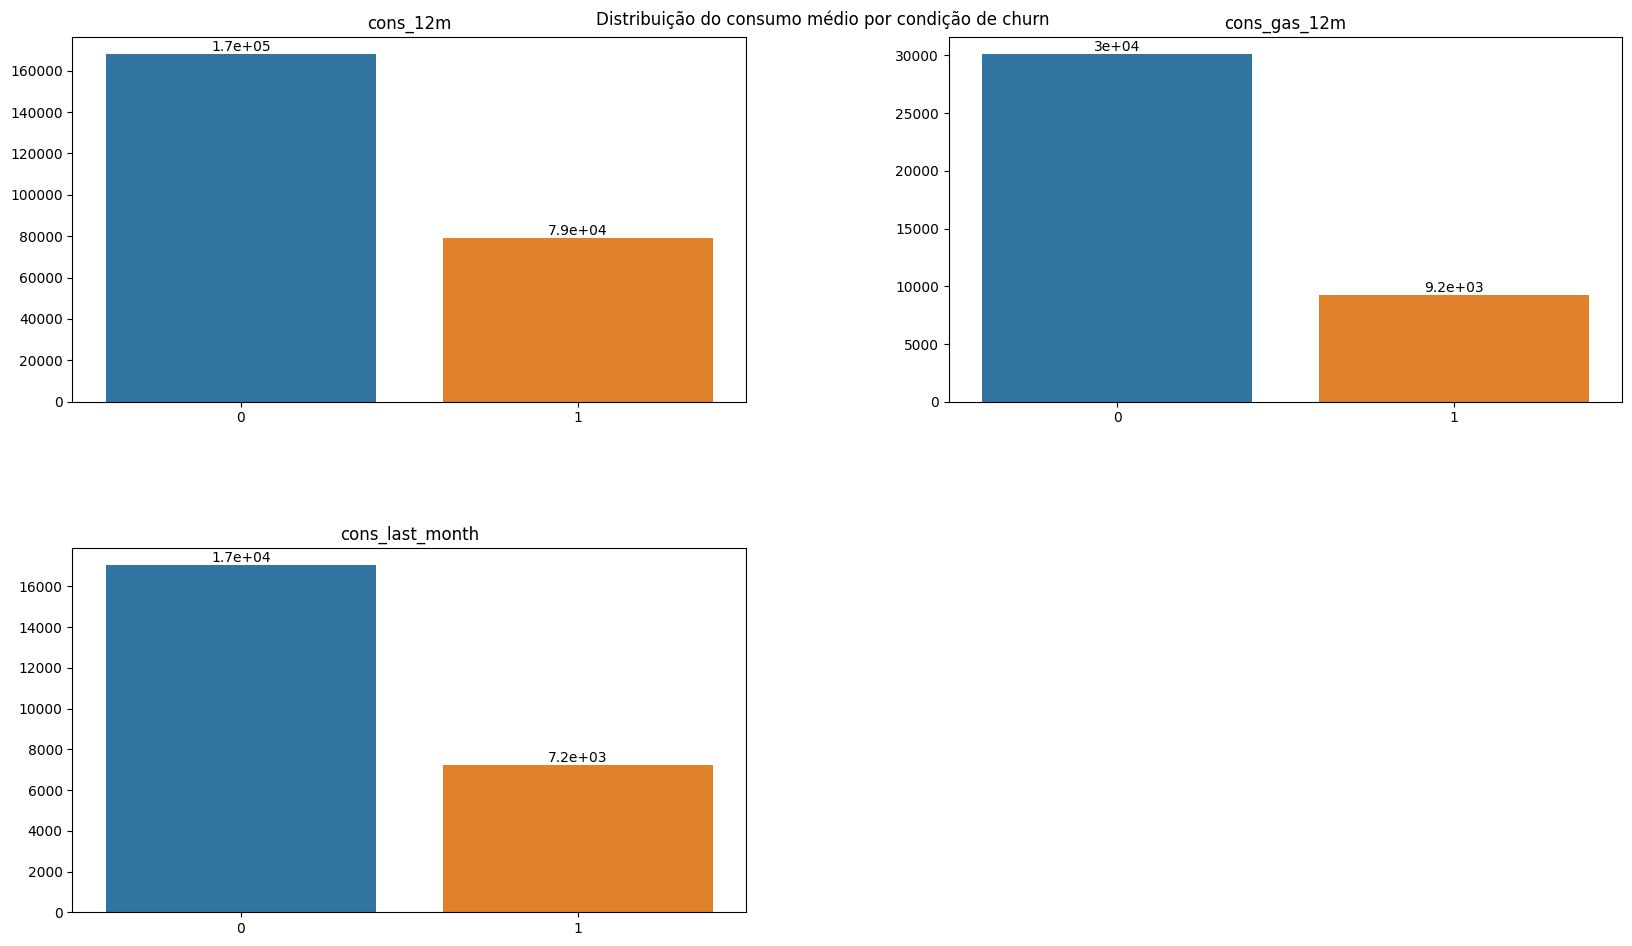

In [98]:
plot_bar_variaveis(conjunto=vars_consumo, dataframe=df_churn_mean, x_var='churn', annotate=True, title='Comparação do consumo médio por condição de churn')

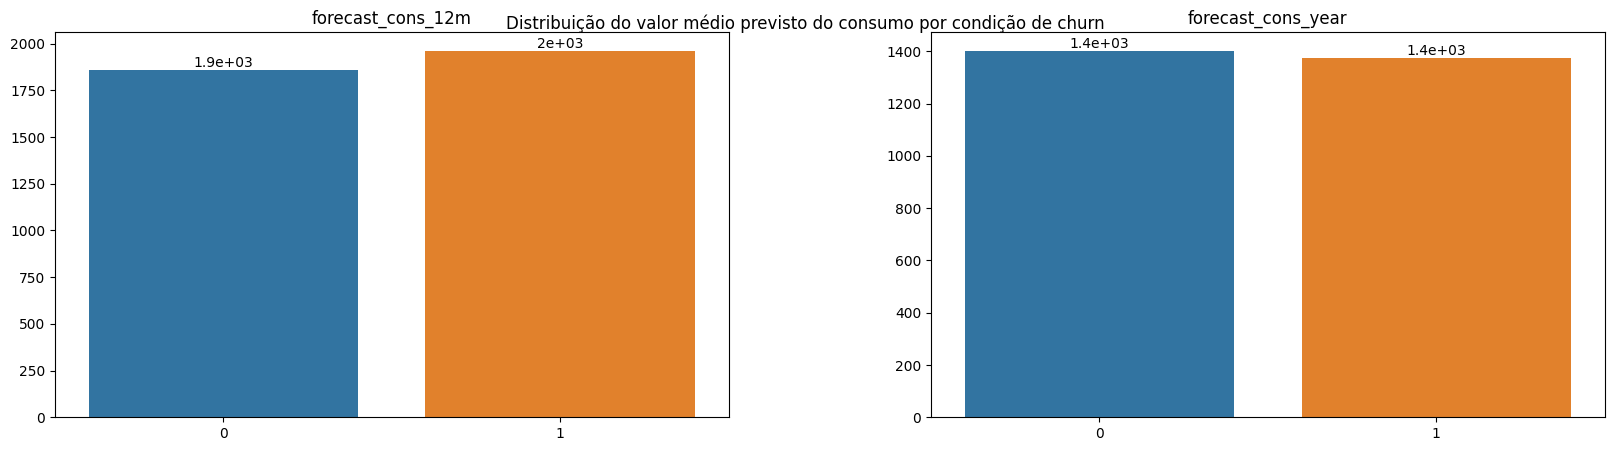

In [97]:
plot_bar_variaveis(conjunto=vars_consumo_previsto, dataframe=df_churn_mean, x_var='churn', annotate=True, title='Comparação do valor médio previsto do consumo por condição de churn')

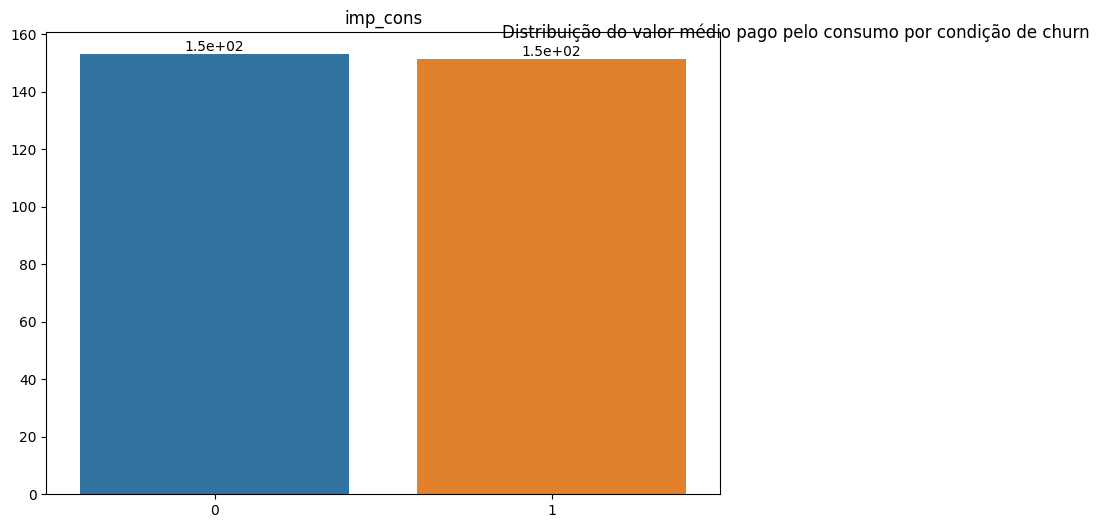

In [96]:
plot_bar_variaveis(conjunto=vars_consumo_pago, dataframe=df_churn_mean, x_var='churn', annotate=True, title='Comparação do valor médio pago pelo consumo por condição de churn')

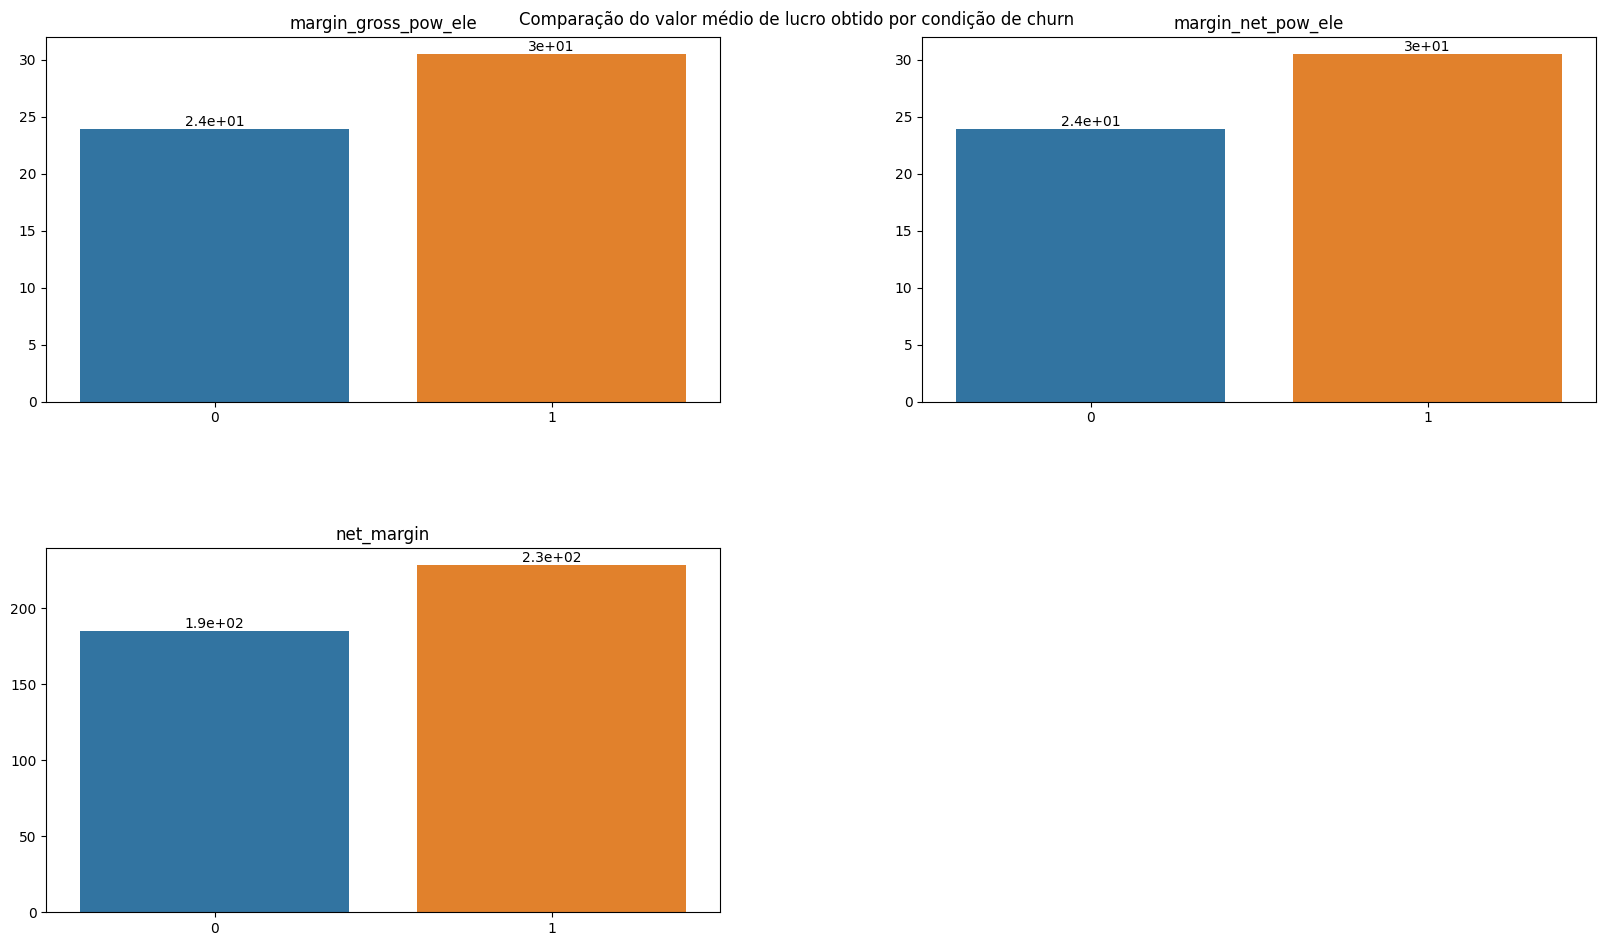

In [102]:
plot_bar_variaveis(conjunto=vars_lucro, dataframe=df_churn_mean, x_var='churn', annotate=True, title='Comparação do valor médio de lucro obtido por condição de churn')

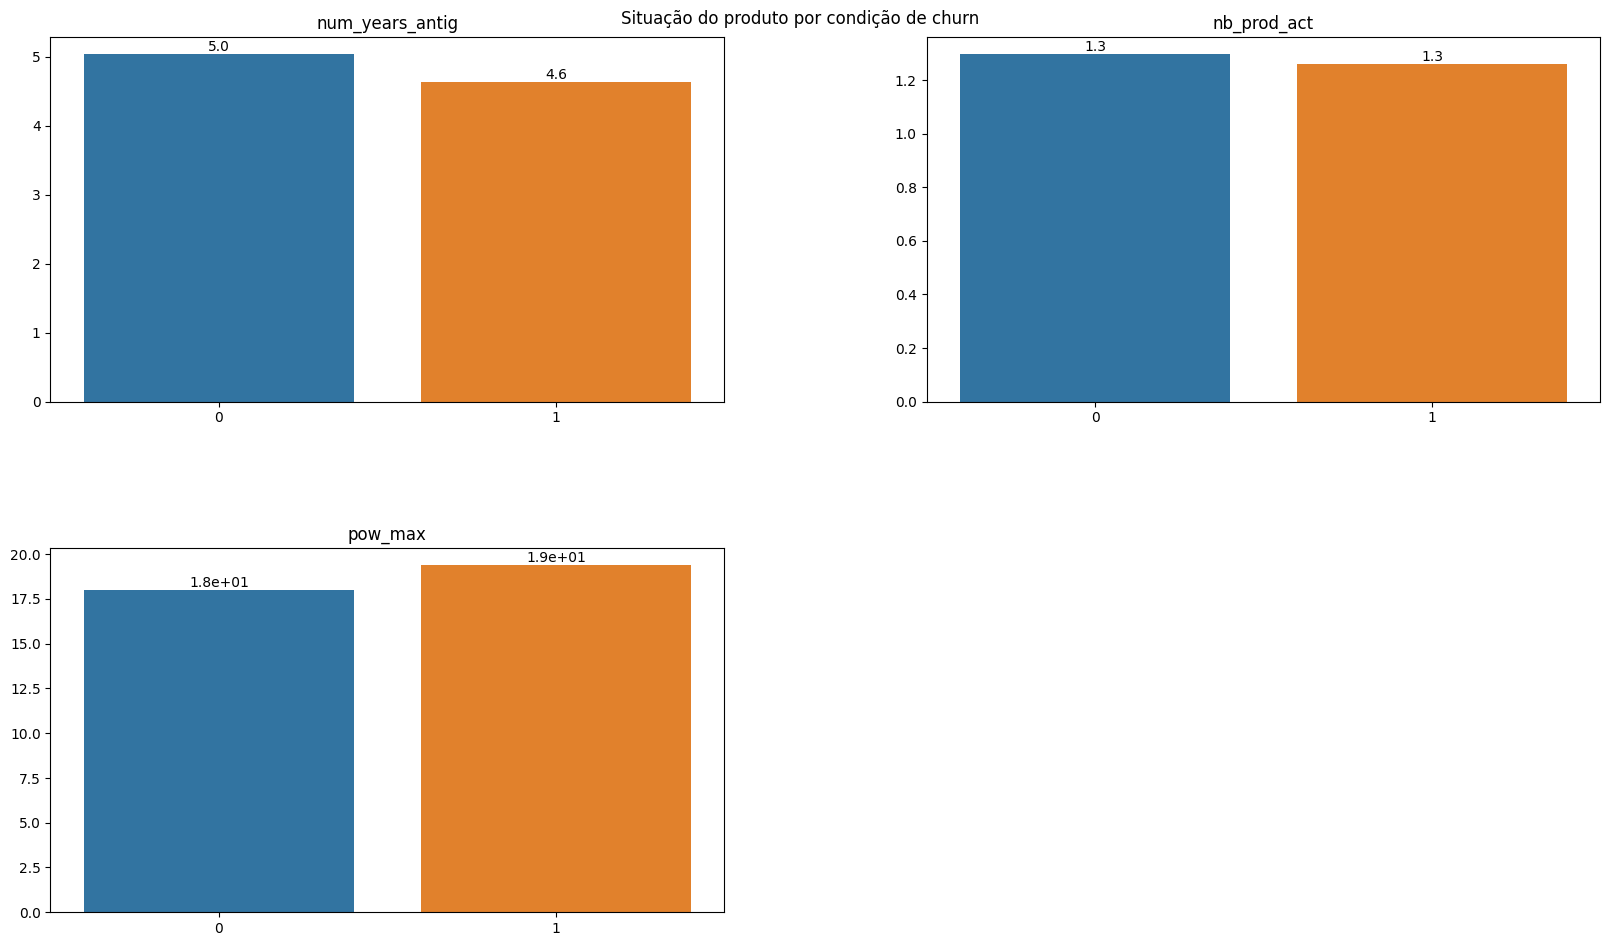

In [104]:
plot_bar_variaveis(conjunto=vars_produto, dataframe=df_churn_mean, x_var='churn', annotate=True, title='Situação do produto por condição de churn')